In [50]:
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

welfare = raw_welfare.copy()

In [52]:
welfare = welfare.rename(
    columns = {'h14_g3' : 'sex',
              'h14_g4' : 'birth',
              'h14_g10' : 'marriage_type',
              'h14_g11' : 'religion',
              'p1402_8aq1' : 'income',
              'h14_eco9' : 'code_job',
              'h14_reg7' : 'code_region'})

In [53]:
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')
welfare['sex'].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

In [54]:
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<AxesSubplot:xlabel='sex', ylabel='mean_income'>

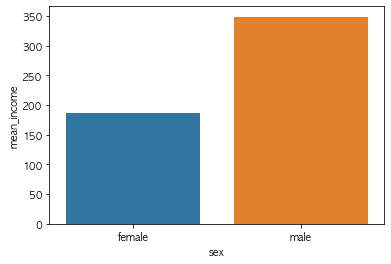

In [55]:
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income')

In [56]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

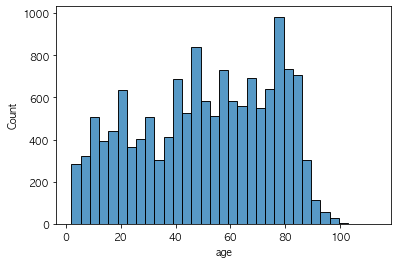

In [57]:
sns.histplot(data = welfare, x = 'age')

In [58]:
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,age,mean_income
0,19.0,162.000000
1,20.0,121.333333
2,21.0,136.400000
3,22.0,123.666667
4,23.0,179.676471


<AxesSubplot:xlabel='age', ylabel='mean_income'>

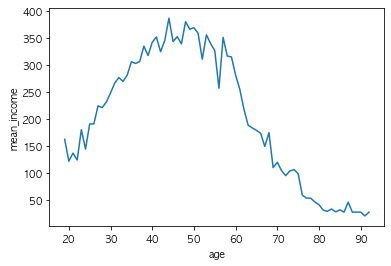

In [59]:
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')

In [60]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                        np.where(welfare['age'] <= 59, 'middle', 'old')))

welfare['ageg'].value_counts()

old       5955
middle    4963
young     3500
Name: ageg, dtype: int64

<AxesSubplot:xlabel='ageg', ylabel='count'>

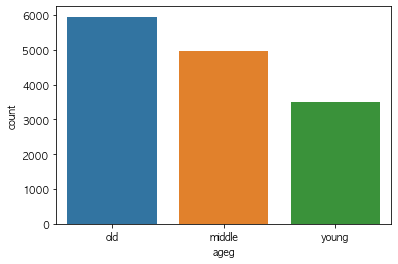

In [61]:
sns.countplot(data = welfare, x = 'ageg')

In [62]:
ageg_income = welfare.dropna(subset = ['income']) \
                    .groupby('ageg', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))

<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

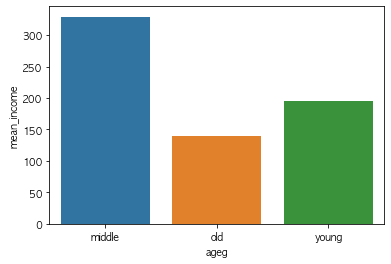

In [63]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income')

<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

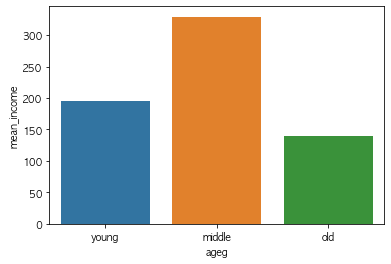

In [64]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
           order = ['young', 'middle', 'old'])

In [65]:
sex_income = \
    welfare.dropna(subset = ['income']) \
            .groupby(['ageg', 'sex'], as_index = False) \
            .agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

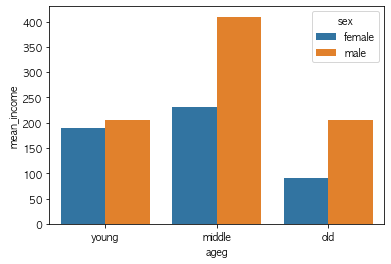

In [66]:
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue = 'sex',
            order = ['young', 'middle', 'old'])

In [67]:
sex_age = welfare.dropna(subset = ['income']) \
                .groupby(['age', 'sex'], as_index = False) \
                .agg(mean_income = ('income', 'mean'))
sex_age.head()

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


<AxesSubplot:xlabel='age', ylabel='mean_income'>

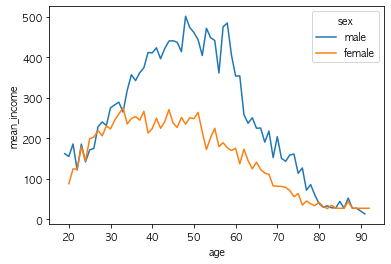

In [68]:
sns.lineplot(data = sex_age, x = 'age', y = 'mean_income', hue = 'sex')

In [69]:
welfare['code_job'].dtypes

dtype('float64')

In [70]:
welfare['code_job'].value_counts()

611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: code_job, Length: 150, dtype: int64

In [71]:
list_job = pd.read_excel("Koweps_Codebook_2019.xlsx", sheet_name = "직종코드")
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [72]:
list_job.shape

(156, 2)

In [73]:
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')

In [74]:
welfare.dropna(subset = ['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [75]:
job_income = welfare.dropna(subset = ['job', 'income']) \
                    .groupby('job', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [76]:
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [77]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'AppleGothic'})

<AxesSubplot:xlabel='mean_income', ylabel='job'>

/Users/minsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


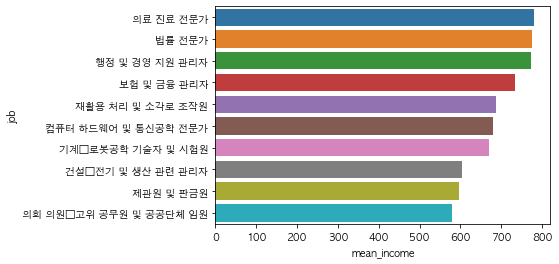

In [78]:
sns.barplot(data = top10, y = 'job', x = 'mean_income')

In [79]:
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

/Users/minsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


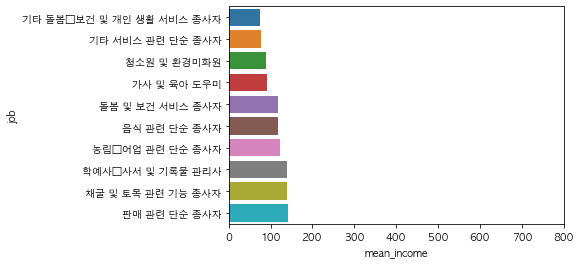

In [80]:
sns.barplot(data = bottom10, y = 'job', x = 'mean_income') \
    .set(xlim = (0, 800))

In [81]:
job_male = welfare.dropna(subset = ['job']) \
                    .query('sex == "male"') \
                    .groupby('job', as_index = False) \
                    .agg(n = ('job', 'count')) \
                    .sort_values('n', ascending = False) \
                    .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [82]:
job_female = welfare.dropna(subset = ['job']) \
                    .query('sex == "female"') \
                    .groupby('job', as_index = False) \
                    .agg(n = ('job', 'count')) \
                    .sort_values('n', ascending = False) \
                    .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


[(0.0, 500.0)]

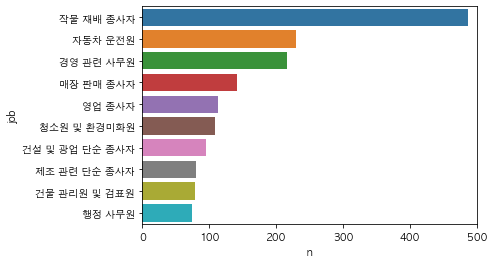

In [83]:
sns.barplot(data = job_male, y = 'job', x = 'n').set(xlim = (0, 500))

[(0.0, 500.0)]

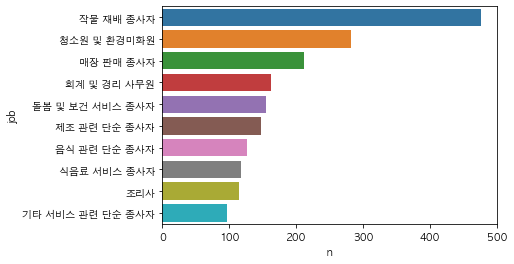

In [84]:
sns.barplot(data = job_female, y = 'job', x = 'n').set(xlim = (0, 500))

In [85]:
welfare['religion'].dtypes

dtype('float64')

In [86]:
welfare['religion'].value_counts()

2.0    7815
1.0    6603
Name: religion, dtype: int64

In [87]:
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')

welfare['religion'].value_counts()

no     7815
yes    6603
Name: religion, dtype: int64

<AxesSubplot:xlabel='religion', ylabel='count'>

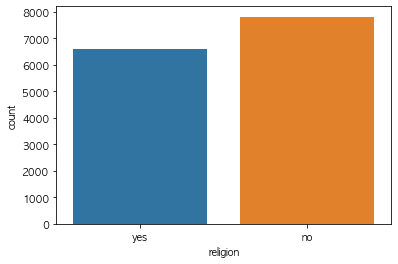

In [88]:
sns.countplot(data = welfare, x = 'religion')

In [89]:
welfare['marriage_type'].dtypes

dtype('float64')

In [90]:
welfare['marriage_type'].value_counts()

1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: marriage_type, dtype: int64

In [91]:
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                              np.where(welfare['marriage_type'] == 3, 'divorce',
                                      'etc'))

In [92]:
n_divorce = welfare.groupby('marriage', as_index = False) \
                    .agg(n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<AxesSubplot:xlabel='marriage', ylabel='n'>

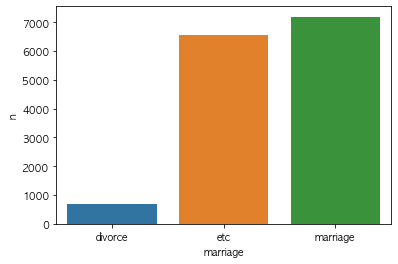

In [93]:
sns.barplot(data = n_divorce, x = 'marriage', y = 'n')

In [95]:
rel_div = welfare.query('marriage != "etc"') \
                .groupby('religion', as_index = False) \
                ['marriage'] \
                .value_counts(normalize = True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [96]:
rel_div = rel_div.query('marriage == "divorce"') \
                .assign(proportion = rel_div['proportion'] * 100) \
                .round(1)
rel_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


<AxesSubplot:xlabel='religion', ylabel='proportion'>

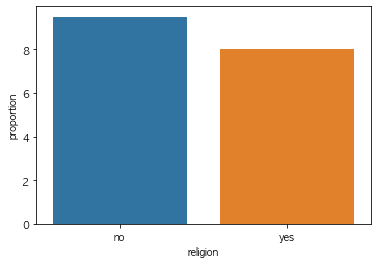

In [97]:
sns.barplot(data = rel_div, x = 'religion', y = 'proportion')

In [98]:
age_div = welfare.query('marriage != "etc"') \
                .groupby('ageg', as_index = False) \
                ['marriage'] \
                .value_counts(normalize = True)
age_div

,ageg,marriage,proportion
0,middle,marriage,0.910302
1,middle,divorce,0.089698
2,old,marriage,0.914220
3,old,divorce,0.085780
4,young,marriage,0.950000
5,young,divorce,0.050000


In [99]:
welfare.query('marriage != "etc"') \
     .groupby('ageg', as_index = False) \
     ['marriage'] \
     .value_counts()

,ageg,marriage,count
0,middle,marriage,3552
1,middle,divorce,350
2,old,marriage,3581
3,old,divorce,336
4,young,marriage,57
5,young,divorce,3


In [100]:
age_div = age_div.query('ageg != "young" & marriage == "divorce"') \
                .assign(proportion = age_div['proportion'] * 100) \
                .round(1)
age_div

,ageg,marriage,proportion
1,middle,divorce,9.0
3,old,divorce,8.6


<AxesSubplot:xlabel='ageg', ylabel='proportion'>

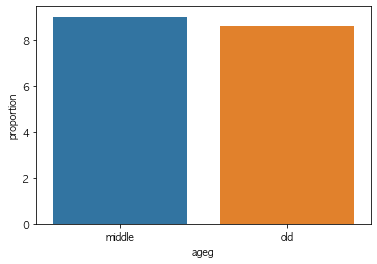

In [101]:
sns.barplot(data = age_div, x = "ageg", y = 'proportion')

In [102]:
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"') \
                .groupby(['ageg', 'religion'], as_index = False) \
                ['marriage'] \
                .value_counts(normalize = True)
age_rel_div

,ageg,religion,marriage,proportion
0,middle,no,marriage,0.904953
1,middle,no,divorce,0.095047
2,middle,yes,marriage,0.917520
3,middle,yes,divorce,0.082480
4,old,no,marriage,0.904382
5,old,no,divorce,0.095618
6,old,yes,marriage,0.922222
7,old,yes,divorce,0.077778


In [103]:
age_rel_div = age_rel_div.query('marriage == "divorce"') \
                        .assign(proportion = age_rel_div['proportion'] * 100) \
                        .round(1)
age_rel_div

,ageg,religion,marriage,proportion
1,middle,no,divorce,9.5
3,middle,yes,divorce,8.2
5,old,no,divorce,9.6
7,old,yes,divorce,7.8


<AxesSubplot:xlabel='ageg', ylabel='proportion'>

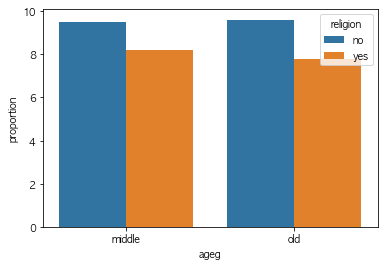

In [104]:
sns.barplot(data = age_rel_div, x = 'ageg', y = 'proportion', hue = 'religion')

In [105]:
welfare['code_region'].dtypes

dtype('float64')

In [106]:
welfare['code_region'].value_counts()

2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: code_region, dtype: int64

In [107]:
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                           'region' : ['서울',
                                      '수도권(인천/경기)',
                                      '부산/경남/울산',
                                      '대구/경북',
                                      '대전/충남',
                                      '강원/충북',
                                      '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [108]:
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [109]:
region_ageg = welfare.groupby('region', as_index = False) \
                    ['ageg'] \
                    .value_counts(normalize = True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.459103
1,강원/충북,middle,0.308707
2,강원/충북,young,0.232190
3,광주/전남/전북/제주도,old,0.449311
4,광주/전남/전북/제주도,middle,0.317924
5,광주/전남/전북/제주도,young,0.232766
6,대구/경북,old,0.504051
7,대구/경북,middle,0.296296
8,대구/경북,young,0.199653
9,대전/충남,old,0.413372


In [110]:
region_ageg = region_ageg.assign(proportion = region_ageg['proportion'] * 100) \
                        .round(1)
region_ageg

,region,ageg,proportion
0,강원/충북,old,45.9
1,강원/충북,middle,30.9
2,강원/충북,young,23.2
3,광주/전남/전북/제주도,old,44.9
4,광주/전남/전북/제주도,middle,31.8
5,광주/전남/전북/제주도,young,23.3
6,대구/경북,old,50.4
7,대구/경북,middle,29.6
8,대구/경북,young,20.0
9,대전/충남,old,41.3


<AxesSubplot:xlabel='proportion', ylabel='region'>

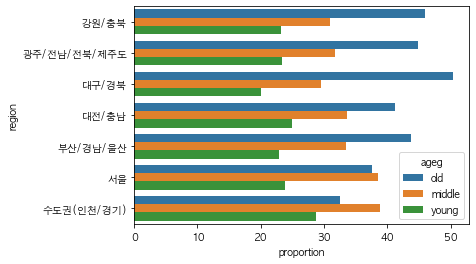

In [111]:
sns.barplot(data = region_ageg, y = 'region', x = 'proportion', hue = 'ageg')

In [112]:
pivot_df = region_ageg[['region', 'ageg', 'proportion']].pivot(index = 'region',
                                                              columns = 'ageg',
                                                              values = 'proportion')
pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권(인천/경기),38.8,32.5,28.7


<AxesSubplot:ylabel='region'>

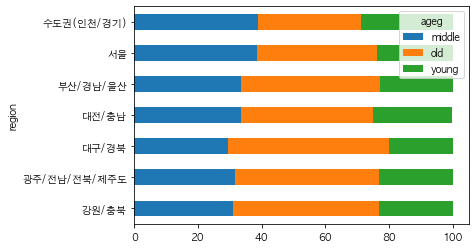

In [113]:
pivot_df.plot.barh(stacked = True)

In [114]:
reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기),28.7,38.8,32.5
서울,23.9,38.5,37.6
대전/충남,25.0,33.6,41.3
부산/경남/울산,22.9,33.4,43.8
광주/전남/전북/제주도,23.3,31.8,44.9
강원/충북,23.2,30.9,45.9
대구/경북,20.0,29.6,50.4


<AxesSubplot:ylabel='region'>

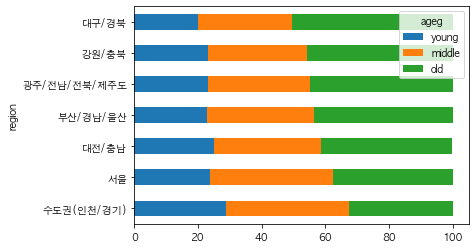

In [115]:
reorder_df.plot.barh(stacked = True)